# Bimodal Setup unit test

In [19]:
import sys  
sys.path.insert(1, './../../../../ESN-IP/SOURCES/.')

import random

random.seed(10)


In [20]:
from Reservoir import Reservoir
from ESN import EchoStateNetwork
from IPReservoir import IPReservoir
from IPMask import IPMask
from DATA import MG17

In [21]:
import torch
import numpy
import random

In [22]:
data = MG17(True, [80,0,20])

X_TR, Y_TR = data.TR()
X_TS, Y_TS = data.TS()



In [23]:
N = 50

In [24]:
vanilla_reservoir = IPReservoir(N=N, bias = False, desired_rho=0.96)

## Unimodal

In [25]:
unimodal_reservoir = IPReservoir(N=N, bias = False, desired_rho=0.1, mask=IPMask.gaussian(N, 0.25))

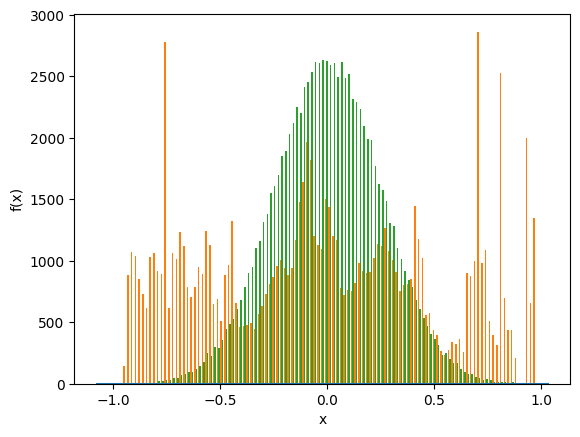

In [26]:

unimodal_reservoir.plot_neural_activity(X_TS)

In [27]:
unimodal_reservoir.IP_online(X_TR, eta=0.0000025, epochs=10)

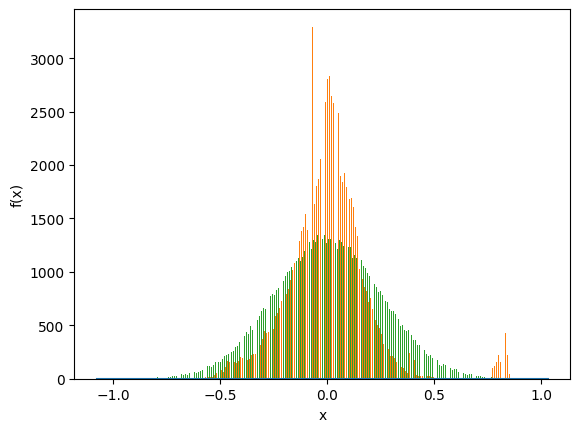

In [28]:

unimodal_reservoir.plot_neural_activity(X_TS)

In [29]:
unimodal_reservoir.rescale_weights(0.95)

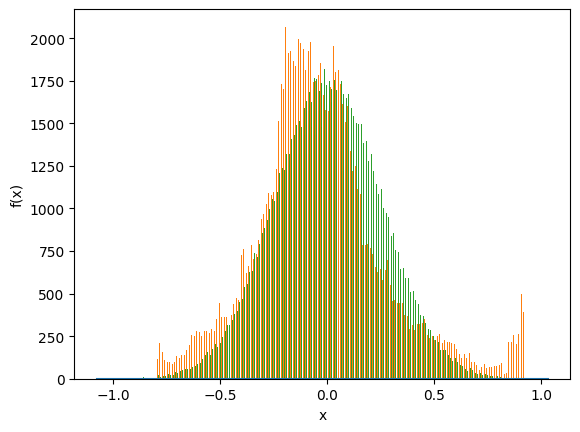

In [30]:

unimodal_reservoir.plot_neural_activity(X_TS)

In [31]:
unimodal_reservoir.b


tensor([-4.8550e-01, -9.6139e-01,  9.8528e-01,  9.8093e-01, -2.4715e-01,
         6.3858e-01, -1.6481e-01,  8.0784e-01, -1.0442e-01, -1.4121e-02,
        -1.4419e-01,  2.5038e-01, -8.0922e-01,  8.3653e-02, -1.0790e+00,
         4.7405e-01, -8.9384e-04, -7.7806e-01,  1.0196e+00,  2.3591e-01,
        -4.2535e-01,  8.7819e-01, -3.8894e-01,  4.6027e-01, -3.9338e-01,
        -8.1890e-01,  1.1602e+00, -7.0078e-02, -9.0685e-01,  5.2023e-01,
         4.3629e-01, -8.6076e-01,  7.2318e-02, -2.1845e-02, -1.1478e+00,
         2.1926e-01, -1.1368e+00, -2.9196e-01,  1.2245e-01,  7.9974e-01,
         2.0814e-01, -6.6483e-02,  8.4961e-02,  1.2005e+00,  6.7371e-01,
        -2.2752e-01, -5.0361e-01,  1.0188e-01,  1.6566e-01,  1.0024e+00])

In [32]:
unimodal_reservoir.a

tensor([1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811,
        1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811,
        1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811,
        1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811,
        1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811, 1.1811,
        1.1811, 1.1811, 1.1811, 1.1811, 1.1811])

## Bimodal

In [33]:
bimodal_reservoir = IPReservoir(N=N, bias = False, desired_rho=0.1, mask=IPMask.bimodal(N))

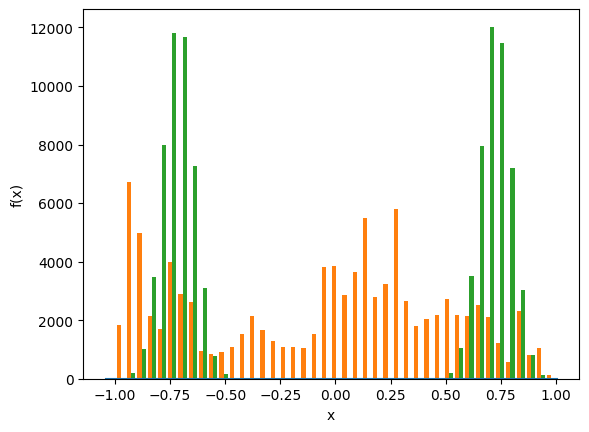

In [34]:
bimodal_reservoir.plot_neural_activity(X_TS)

In [35]:
bimodal_reservoir.IP_online(X_TR, eta=0.0000005, epochs=5)

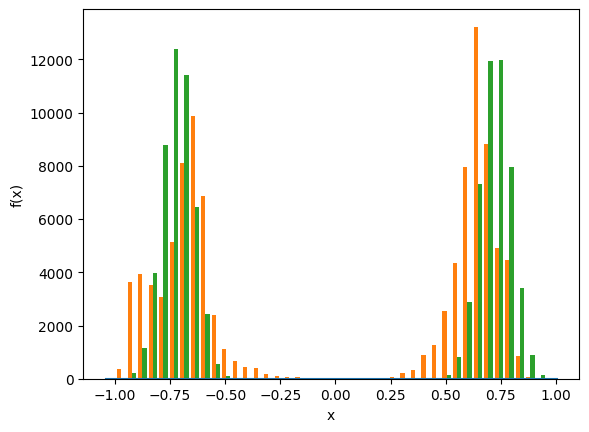

In [36]:
bimodal_reservoir.plot_neural_activity(X_TS)

In [37]:
unimodal_reservoir.rescale_weights(0.95)

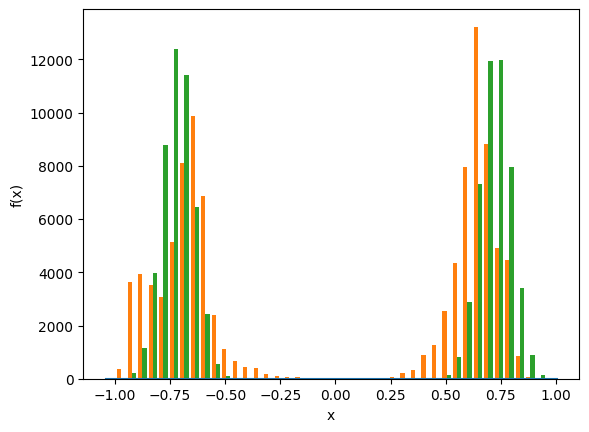

In [38]:
bimodal_reservoir.plot_neural_activity(X_TS)

In [39]:
bimodal_reservoir.a

tensor([1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188,
        1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188,
        1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188,
        1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188,
        1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188, 1.0188,
        1.0188, 1.0188, 1.0188, 1.0188, 1.0188])

## Trimodal

In [189]:
trimodal_reservoir = IPReservoir(N=N, bias = False, desired_rho=0.9, mask=IPMask.trimodal(N, mu=0.72, linear_rate=8/9, std_lin=0.25, std_bim = 0.07))

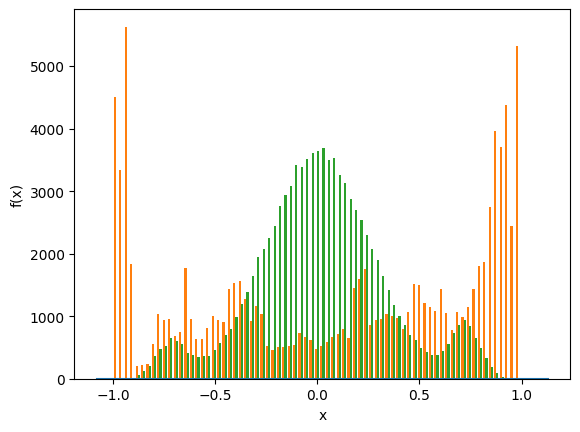

In [184]:
trimodal_reservoir.plot_neural_activity(X_TS)

In [247]:
trimodal_reservoir.IP_online(X_TR, eta=0.0000005, epochs=50)

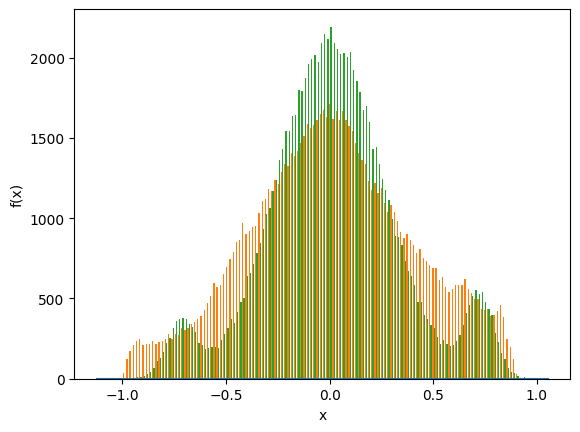

In [248]:
trimodal_reservoir.plot_neural_activity(X_TS, transient=100)

In [249]:
trimodal_reservoir.rho()

tensor(1.1989)

In [250]:
trimodal_reservoir.rescale_weights(1.0356)

In [251]:
trimodal_reservoir.rescale_weights(0.96)

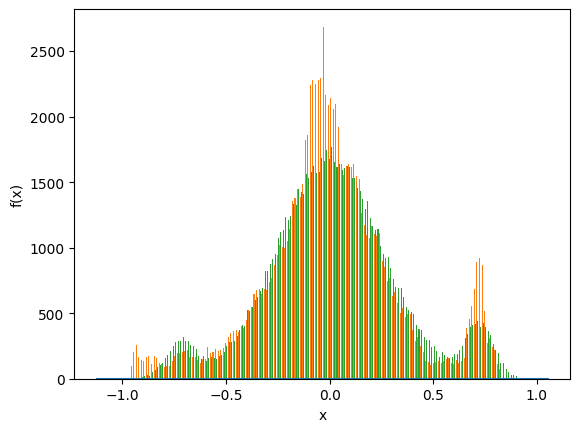

In [263]:
trimodal_reservoir.plot_neural_activity(X_TS, transient=100)

## Estrinsic Metrics

In [229]:
from ESN import EchoStateNetwork

from Metrics import *
Error = MSE(True)

Reservoir warmed up with the first 100 time steps


tensor(3.0354e-07, dtype=torch.float64)

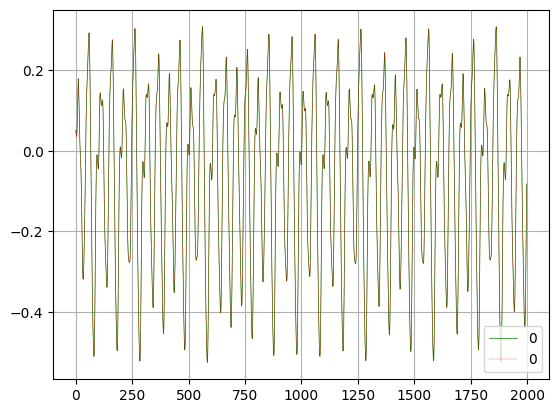

In [230]:
esn = EchoStateNetwork(vanilla_reservoir)

esn.train(X_TR, Y=Y_TR, transient=100)
y_pred = esn.predict(X_TS)
Error.evaluate(y_pred, Y_TS)

Reservoir warmed up with the first 100 time steps


tensor(2.6893e-07, dtype=torch.float64)

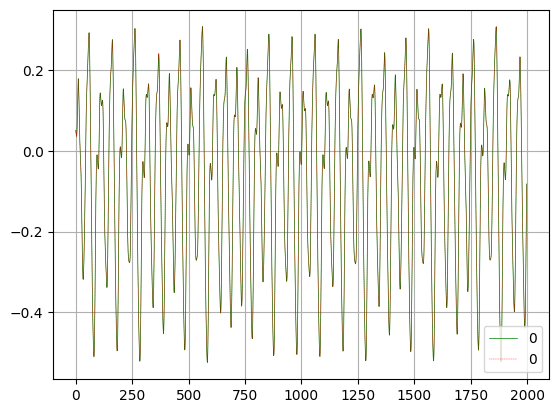

In [50]:
esn = EchoStateNetwork(unimodal_reservoir)
esn.train(X_TR, Y=Y_TR, transient=100)
y_pred = esn.predict(X_TS)
Error.evaluate(y_pred, Y_TS)

Reservoir warmed up with the first 100 time steps


tensor(3.3205e-06, dtype=torch.float64)

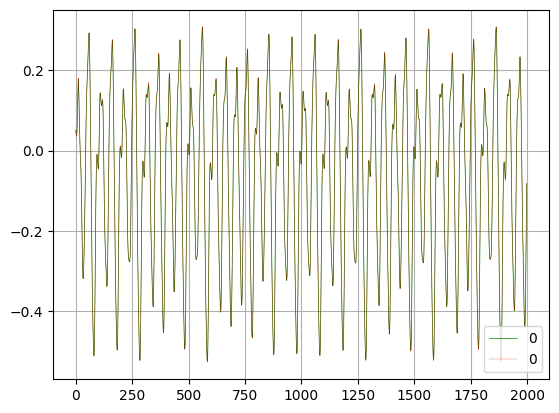

In [51]:
esn = EchoStateNetwork(bimodal_reservoir)
esn.train(X_TR, Y=Y_TR, transient=100)
y_pred = esn.predict(X_TS)
Error.evaluate(y_pred, Y_TS)

Reservoir warmed up with the first 100 time steps


tensor(2.1999e-07, dtype=torch.float64)

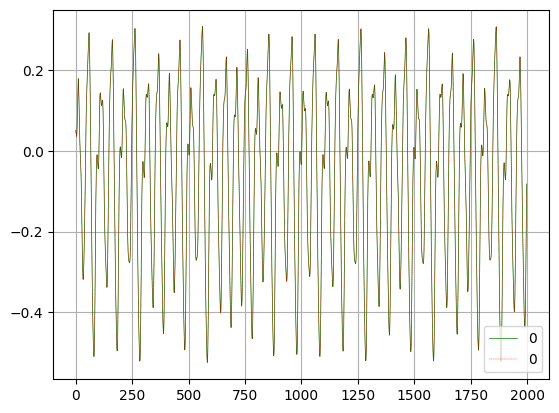

In [262]:
esn = EchoStateNetwork(trimodal_reservoir)
esn.train(X_TR, Y=Y_TR, transient=100)
y_pred = esn.predict(X_TS)
Error.evaluate(y_pred, Y_TS)

## Intrinsic Metrics 

In [254]:
MemoryCapacity = MC()
DeviationFromLinearity = DeltaPhi()
EffectiveDimension = Neff()
LambdaMax = MLLE(X_TS)


In [236]:
EffectiveDimension.evaluate(vanilla_reservoir)

2.0425633696329557

In [255]:
EffectiveDimension_row = [EffectiveDimension.evaluate(unimodal_reservoir), EffectiveDimension.evaluate(bimodal_reservoir), EffectiveDimension.evaluate(trimodal_reservoir)]

In [256]:
EffectiveDimension_row

[3.851449788581889, 1.090796313323539, 2.711076846851394]

In [239]:
DeviationFromLinearity.evaluate(vanilla_reservoir)

0.06008332439334749

In [257]:
DeltaPhi_row = [DeviationFromLinearity.evaluate(unimodal_reservoir),DeviationFromLinearity.evaluate(bimodal_reservoir), DeviationFromLinearity.evaluate(trimodal_reservoir)]

In [258]:
DeltaPhi_row

[0.14287835201193422, 0.04638431920741794, 0.1812761320250391]

In [147]:
LambdaMax.evaluate(vanilla_reservoir)

-1.007126

In [259]:
LambdaMax_row = [LambdaMax.evaluate(unimodal_reservoir),LambdaMax.evaluate(bimodal_reservoir), LambdaMax.evaluate(trimodal_reservoir)]

In [260]:
LambdaMax_row

[0.08819448, -2.8401682, 0.15994753]

In [244]:
MemoryCapacity.evaluate(vanilla_reservoir)

tensor(7.4052)

In [107]:
MC_row = [MemoryCapacity.evaluate(unimodal_reservoir),MemoryCapacity.evaluate(bimodal_reservoir), MemoryCapacity.evaluate(trimodal_reservoir)]

In [108]:
MC_row

[tensor(11.8825), tensor(4.5011), tensor(8.1235)]

In [261]:
MemoryCapacity.evaluate(trimodal_reservoir)

tensor(9.3553)